# Tensorflow Basics
## Lesson 2

Your very first Neural Network model using Tensorflow! You are going to learn how to model a simple line y = m x + b and use it to predict the values of y given x values.

In [5]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # use this plot style
import sys
%matplotlib inline

print('Python version ' + sys.version)
print('Tensorflow version ' + tf.VERSION)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.5.3 | packaged by conda-forge | (default, Feb 10 2017, 07:09:50) 
[GCC 4.2.1 Compatible Apple LLVM 7.3.0 (clang-703.0.31)]
Tensorflow version 1.0.1
Pandas version 0.19.2
Numpy version 1.12.0


# Create Training Data

y = m * x + b  

* We are going to call our x variable, train_x
* We are going to call our y variable, train_y

In [6]:
# let's generate 100 random samples
train_x = np.random.rand(100).astype(np.float32)

# let's compute train_y using 0.1 for m and 0.3 for b
m = 0.1
b = 0.3
train_y = m*train_x + b

In [21]:
df = pd.DataFrame({"x":train_x, "y":train_y})
df.head()

,x,y
0,0.552191,0.355219
1,0.772486,0.377249
2,0.856317,0.385632
3,0.095245,0.309525
4,0.020935,0.302094


In [22]:
df.describe()

,x,y
count,100.000000,100.000000
mean,0.506336,0.350634
std,0.293891,0.029389
min,0.020935,0.302094
25%,0.283222,0.328322
50%,0.438486,0.343849
75%,0.771681,0.377168
max,0.980886,0.398089


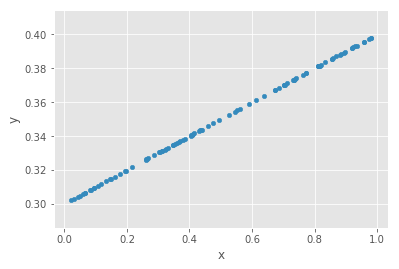

In [25]:
df.plot.scatter(x="x", y="y")

In [26]:
# this is the data we are going to use to make sure our model is generating good predictions
test_x = np.random.rand(100).astype(np.float32)

# Model your Graph
> IMPORTANT functions/parameters to play with

* **loss** - There are various functions you can choose to measure the error between train_y (your training data) and pred (your models predicted value)
* **GradientDescentOptimizer(LEARNING_RATE)** - Modify this number to see how your results change

## Variables
* **Constants** - Values created before you run our model that do not change.
* **Placeholders** - Values that are fed into your model at run time.
* **Variables** - Values that are modified at run time by your model.
* **W** - Weights for your output layer.
* **b** - Biases for your output layer.

In [63]:
# placeholders x, y
size = len(train_x)
x = tf.placeholder(tf.float32, shape=(size), name="x")
y = tf.placeholder(tf.float32, shape=(size), name="y")

# variables w,b,pred
# Note that np.random.rand() is used to initialize your variables
w = tf.Variable(np.random.rand())
b = tf.Variable(0.)
pred = w*x+b

# minimize the mean squared errors
# as mentioned above there are other ways to measure the error between train_y and pred
loss = tf.reduce_mean(tf.square(y-pred)) # change this to see if optimizer works or not?

# we pick our optimizer and a learning rate
optimizer = tf.train.AdamOptimizer(0.1)

# we train our model by minimizing our loss function
train = optimizer.minimize(loss)


# Time to Train!
> When working with Variables you must initialize them with some default values, **tf.global_variables_initializer()** does that for you.

You are going to train your model 200 times and see if we can create a model that can accurately predict. Play around with the number of training rounds, the Learning Rate, and see how this changes your results.

In [61]:
#initialize the variables
init = tf.global_variables_initializer()
epochs = 300

#run graph
with tf.Session() as sess:
    sess.run(init)
    
    #fit the function
    for step in range(epochs):
        train_data = {x:train_x, y:train_y}
        sess.run(train, feed_dict=train_data)
        print(step, sess.run(w), sess.run(b))
        
    # note that W and b mach the line we are tying to model (y = 0.1x + 0.3)
    print("Training completed:", "W=", sess.run(w), "b=", sess.run(b))
    
    # run your trained model on the test data set
    test_results = sess.run(pred, feed_dict={x: test_x})
    
    # capture the predicted results so you can plot them
    df_final = pd.DataFrame({'test_x':test_x,
                             'pred':test_results})

0 0.709693 -0.0999997
1 0.63799 -0.0741064
2 0.586521 -0.0158634
3 0.540385 0.0519537
4 0.488363 0.116849
5 0.426704 0.168368
6 0.357037 0.20239
7 0.282846 0.222517
8 0.208786 0.236063
9 0.140806 0.250608
10 0.0845431 0.271343
11 0.0423923 0.29938
12 0.0126578 0.332208
13 -0.0087958 0.364989
14 -0.0265297 0.391974
15 -0.0438929 0.408745
16 -0.0619442 0.414262
17 -0.0793251 0.41078
18 -0.0930125 0.402395
19 -0.0996777 0.393536
20 -0.0972519 0.387506
21 -0.0858234 0.385368
22 -0.0674226 0.385803
23 -0.0452049 0.385914
24 -0.0224898 0.38256
25 -0.00176572 0.373758
26 0.0160473 0.359517
27 0.0316712 0.34175
28 0.0468533 0.323513
29 0.063376 0.30789
30 0.0821182 0.296817
31 0.10257 0.29039
32 0.12297 0.287042
33 0.140968 0.284397
34 0.154555 0.280405
35 0.16288 0.274271
36 0.166504 0.266765
37 0.167022 0.259791
38 0.166279 0.255467
39 0.16555 0.255107
40 0.165042 0.258622
41 0.163948 0.264618
42 0.160992 0.271079
43 0.155194 0.276291
44 0.146454 0.27958
45 0.135682 0.281498
46 0.124429 0.28

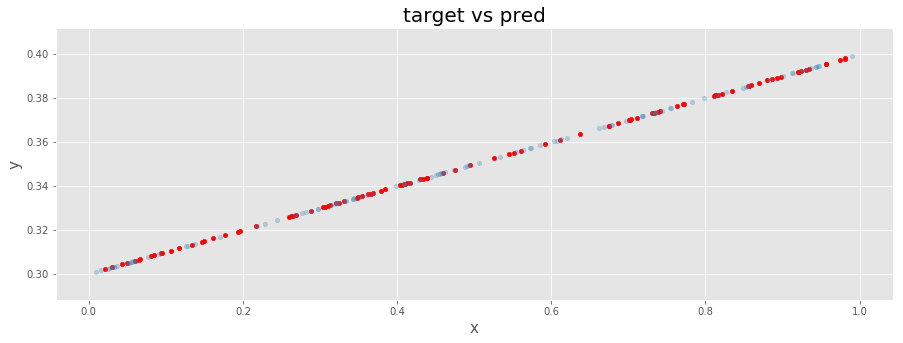

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Chart 1 - Shows the line we are trying to model
df.plot.scatter(x='x', y='y', ax=axes, color='red')

# Chart 2 - Shows the line our trained model came up with
df_final.plot.scatter(x='test_x', y='pred', ax=axes, alpha=0.3)

# add a little sugar
axes.set_title('target vs pred', fontsize=20)
axes.set_ylabel('y', fontsize=15)
axes.set_xlabel('x', fontsize=15);